In [1]:
# First import the functions we will need
from __future__ import absolute_import, division, print_function, unicode_literals

try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# GradientTape

The Calculus is managed by a TensorFlow Gradient Tape. You can learn more about the gradient tape at https://www.tensorflow.org/api_docs/python/tf/GradientTape, and we will discuss it later in the course.

In [2]:
# Define our initial guess
INITIAL_W = 10.0
INITIAL_B = 10.0

# Define our loss function
def loss(predicted_y, target_y):
  return tf.reduce_mean(tf.square(predicted_y - target_y))

# Define our training procedure
def train(model, inputs, outputs, learning_rate):
  with tf.GradientTape() as t:
    current_loss = loss(model(inputs), outputs)
    # Here is where you differentiate the model values with respect to the loss function
    dw, db = t.gradient(current_loss, [model.w, model.b])
    # And here is where you update the model values based on the learning rate chosen
    model.w.assign_sub(learning_rate * dw)
    model.b.assign_sub(learning_rate * db)
    return current_loss

# Define our simple linear regression model
class Model(object):
  def __init__(self):
    # Initialize the weights
    self.w = tf.Variable(INITIAL_W)
    self.b = tf.Variable(INITIAL_B)

  def __call__(self, x):
    return self.w * x + self.b

### Train our model

In [ ]:
# Define our input data and learning rate
xs = [-1.0, 0.0, 1.0, 2.0, 3.0, 4.0]
ys = [-3.0, -1.0, 1.0, 3.0, 5.0, 7.0]
LEARNING_RATE=0.09

# Instantiate our model
model = Model()

# Collect the history of w-values and b-values to plot later
list_w, list_b = [], []
epochs = range(500)
losses = []
for epoch in epochs:
  list_w.append(model.w.numpy())
  list_b.append(model.b.numpy())
  current_loss = train(model, xs, ys, learning_rate=LEARNING_RATE)
  losses.append(current_loss)
  print('Epoch %2d: w=%1.2f b=%1.2f, loss=%2.5f' %
        (epoch, list_w[-1], list_b[-1], current_loss))

### Plot our trained values over time

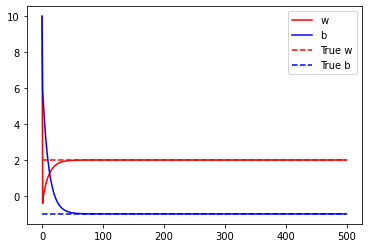

In [6]:
# Plot the w-values and b-values for each training Epoch against the true values
TRUE_w = 2.0
TRUE_b = -1.0
plt.plot(epochs, list_w, 'r', epochs, list_b, 'b')
plt.plot([TRUE_w] * len(epochs), 'r--', [TRUE_b] * len(epochs), 'b--')
plt.legend(['w', 'b', 'True w', 'True b'])
plt.show()

In [8]:
print(model([10.0]))

tf.Tensor([18.999998], shape=(1,), dtype=float32)


Build the model with Karas

In [ ]:
import keras

my_layer = keras.layers.Dense(units=1, input_shape=[1])
model = tf.keras.Sequential([my_layer])
model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1, 0, 1, 2, 3, 4], dtype=float)
ys = np.array([-3, -1, 1, 3, 5, 7], dtype = float)

model.fit(xs, ys, epochs=500)

In [11]:
print(model.predict([10.0]))

[[18.978586]]


print model's parameters

In [12]:
print(my_layer.get_weights())

[array([[1.9968966]], dtype=float32), array([-0.9903791], dtype=float32)]


In [25]:
my_layer1 = keras.layers.Dense(units=5, input_shape=[1])
my_layer2 = keras.layers.Dense(units=3, input_shape=[1])
my_layer3 = keras.layers.Dense(units=1)
model = tf.keras.Sequential([my_layer1, my_layer2, my_layer3])

model.compile(optimizer='sgd', loss='mean_squared_error')

xs = np.array([-1, 0, 1, 2, 3, 4], dtype=float)
ys = np.array([-3, -1, 1, 3, 5, 7], dtype = float)

model.fit(xs, ys, epochs=500)

Epoch 1/500
1/1 [==============================] - 0s 320ms/step - loss: 8.1052
Epoch 2/500
1/1 [==============================] - 0s 7ms/step - loss: 4.7878
Epoch 3/500
1/1 [==============================] - 0s 7ms/step - loss: 2.1792
Epoch 4/500
1/1 [==============================] - 0s 5ms/step - loss: 0.9799
Epoch 5/500
1/1 [==============================] - 0s 6ms/step - loss: 0.6986
Epoch 6/500
1/1 [==============================] - 0s 5ms/step - loss: 0.6333
Epoch 7/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5892
Epoch 8/500
1/1 [==============================] - 0s 15ms/step - loss: 0.5486
Epoch 9/500
1/1 [==============================] - 0s 5ms/step - loss: 0.5104
Epoch 10/500
1/1 [==============================] - 0s 7ms/step - loss: 0.4745
Epoch 11/500
1/1 [==============================] - 0s 5ms/step - loss: 0.4408
Epoch 12/500
1/1 [==============================] - 0s 6ms/step - loss: 0.4091
Epoch 13/500
1/1 [==============================] - 0s 6ms

In [26]:
print(model.predict([10]))

[[18.999998]]


In [29]:
print(my_layer1.get_weights())

[array([[ 0.6336069 , -0.68184894, -1.0918367 ,  1.1440997 , -0.3339997 ]],
      dtype=float32), array([-0.05051852, -0.0402535 ,  0.21419495, -0.25602448, -0.05332486],
      dtype=float32)]


In [27]:
my_layer1.get_weights()[1]

array([-0.05051852, -0.0402535 ,  0.21419495, -0.25602448, -0.05332486],
      dtype=float32)

In [28]:
value_to_predict = 10.0

layer1_w1 = (my_layer1.get_weights()[0][0][0])

layer1_w2 = (my_layer1.get_weights()[0][0][1])

layer1_b1 = (my_layer1.get_weights()[1][0])

layer1_b2 = (my_layer1.get_weights()[1][1])




layer2_w1 = (my_layer2.get_weights()[0][0])

layer2_w2 = (my_layer2.get_weights()[0][1])

layer2_b = (my_layer2.get_weights()[1][0])

 

neuron1_output = (layer1_w1 * value_to_predict) + layer1_b1

neuron2_output = (layer1_w2 * value_to_predict) + layer1_b2

 

neuron3_output = (layer2_w1 * neuron1_output) + (layer2_w2 * neuron2_output) + layer2_b

 

print(neuron3_output)

[ 1.4070121 -4.6104517  2.495318 ]
